# AUTISM SPECTRUM DISORDER

### What is Autism Spectrum disorder?

#### Autism spectrum disorder (ASD) is a complex developmental condition that involves  persistent challenges  in social interaction, speech and nonverbal communication, and restricted/repetitive behaviors. The effects of  ASD and the severity of symptoms are different in each person.

### The need for an ASD model?


#### A time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits.

### Sparcity of Datasets

####  However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. 

### Solution

#### Hence, we propose a new dataset related to autism screening of toddlers that contains influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. We then build  model that gives excellent accuracy in determining the main symptoms which make it easier to recognise the problems at the early stages. 

In [1]:
# used for linear algebra
import numpy as np
# used for data processing (CSV file I/O)
import pandas as pd
# used to supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# matplotlib is a library used to create, customize and extend data in the form of interactive visualization
import matplotlib.pyplot as plt
# data visualization library used to display data in the form of attractive and informative stastical graphs 
import seaborn as sns
%matplotlib inline
data=pd.read_csv('Autism Spectrum Disorder.csv')
# used to obtain first n rows to verify if the obtained data values are accurate and corresponding with required data
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
#used to display the the number of elements per dimension
data.shape

(1054, 19)

In [4]:
#used to describe the statistical values of obtained data
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
# used to diplay the details of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

# Pearson Correlation heatmap 

<AxesSubplot:>

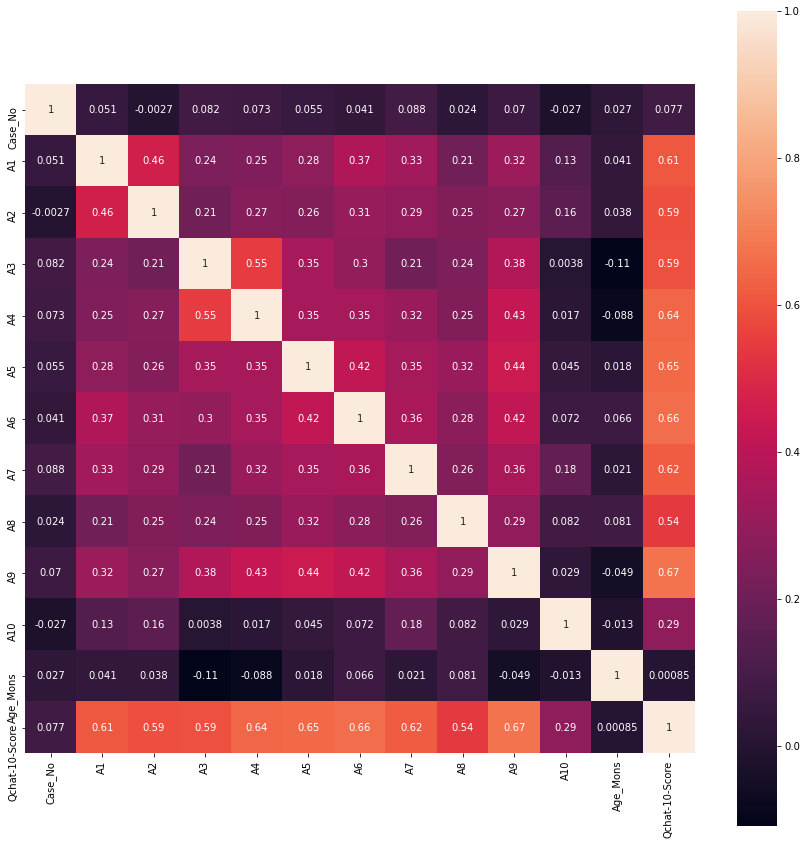

In [6]:
# a heatmap is built to determine the relation between each column in the dataset and the column with the least correlation is eliminated
corr = data.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

#### In the heatmap, orange colour depicts high correlation, which can be observed by the  10 answers from A1 to A9 except A10 are highly correlated with Qchart10-score. Therefore, we remove the Qchat coloumn from our feature list because it is going to mislead our results.

# Graphical representation of data

#### Diplaying ASD based on ethnicity

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

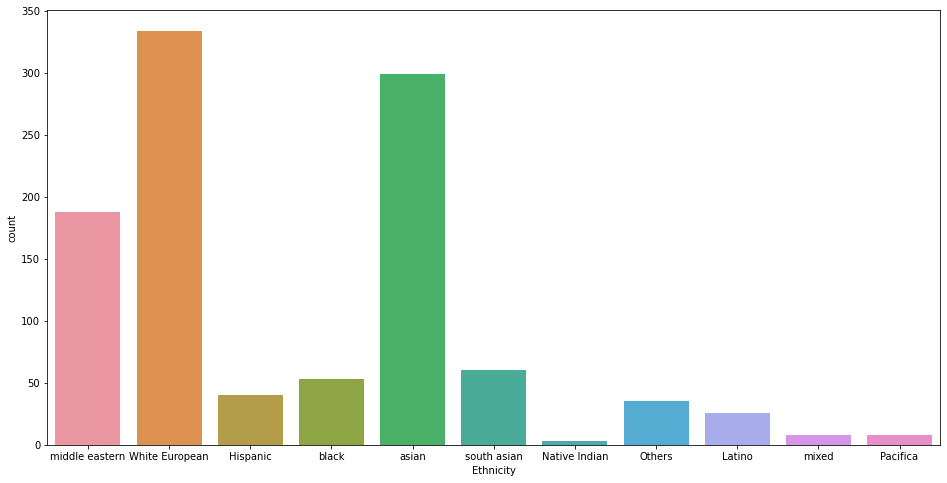

In [7]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = data)

#### Displaying ASD based on Jaundice

<AxesSubplot:xlabel='Jaundice', ylabel='count'>

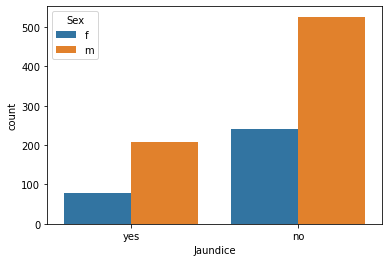

In [8]:
sns.countplot(x = 'Jaundice', hue = 'Sex', data = data)

#### Displaying QChat-10 values based on gender

<AxesSubplot:xlabel='Qchat-10-Score', ylabel='count'>

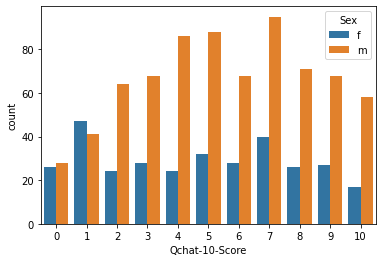

In [9]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = data)

#### Displaying ASD positive result over a stretch of 36 months 

Text(0.5, 0, 'Toddlers age in months')

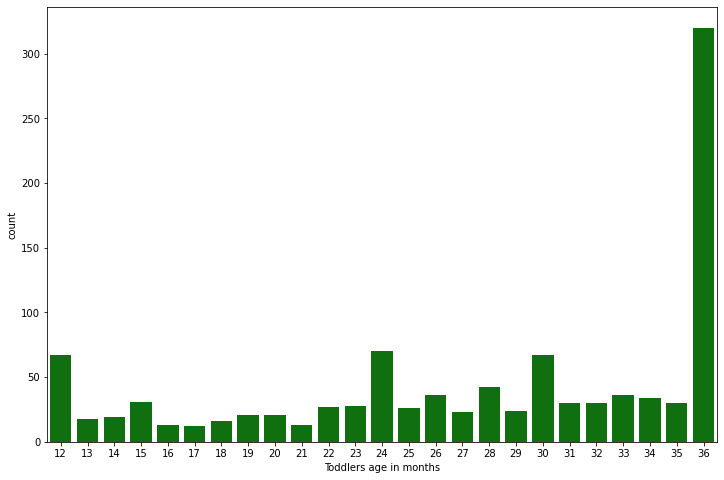

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=data, color="g")
ax.set_xlabel('Toddlers age in months')

In [11]:
# removing QChat-10-Score
data.drop('Qchat-10-Score', axis = 1, inplace = True)

In [12]:
sex = {
  "m": 0,
  "f": 1
}
data.replace({'Sex': sex}, inplace = True)

In [13]:
ethnicity = {
  "middle eastern": 0,
  "White European": 1,
  "Hispanic": 2,
  "black": 3,
  "asian": 4,
  "south asian": 5,
  "Native Indian": 6,
  "Others": 7,
  "Latino": 8,
  "mixed": 9,
  "Pacifica": 10
}
data.replace({'Ethnicity': ethnicity}, inplace = True)

In [14]:
jaundice = {
  "yes": 0,
  "no": 1
}
data.replace({'Jaundice': jaundice}, inplace = True)

In [15]:
asd = {
  "yes": 0,
  "no": 1
}
data.replace({'Family_mem_with_ASD': asd}, inplace = True)

In [16]:
data.drop('Who completed the test',axis=1, inplace = True)

In [17]:
traits = {
  "Yes": 0,
   "No": 1
}
data.replace({'OUTPUT': traits}, inplace = True)


In [18]:
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,1,0,0,1,No
1,2,1,1,0,0,0,1,1,0,0,0,36,0,1,0,1,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,0,0,0,1,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,0,2,1,1,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,1,1,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,1,1,0,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,0,3,0,1,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,0,0,0,1,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,0,1,1,0,No


### Model Building

In [30]:
from sklearn.model_selection import train_test_split
x= data.iloc[:,:-1]
y= data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [31]:
x_train

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
533,534,1,1,1,1,1,1,1,1,1,0,13,0,2,0,1
531,532,1,1,1,1,1,0,1,1,1,1,12,1,0,1,1
669,670,1,1,0,1,1,1,1,0,1,0,14,0,1,1,1
323,324,1,1,1,1,1,1,1,1,1,1,32,0,1,0,1
633,634,1,0,0,1,1,0,0,0,0,1,24,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,0,0,0,0,1,1,0,0,1,1,35,0,4,0,1
973,974,1,1,0,1,1,1,0,1,0,1,36,0,1,0,0
75,76,1,0,0,1,1,1,1,1,1,0,19,0,0,1,1
599,600,1,0,1,0,1,1,1,0,0,1,26,0,4,1,1


In [32]:
y_train

533    Yes
531    Yes
669    Yes
323    Yes
633    Yes
      ... 
575    Yes
973    Yes
75     Yes
599    Yes
863    Yes
Name: Class/ASD Traits , Length: 843, dtype: object

## Calculating Accuracy 

### Logistic Regression Model

In [33]:
# used to import logistic regression  
from sklearn.linear_model import LogisticRegression as logreg 
logmodel= logreg()

In [34]:
# used to train data as arguments
classifier=logmodel.fit(x_train, y_train)

In [35]:
pred=logmodel.predict(x_test)

In [36]:
acc=logmodel.score(x_test, y_test)
print("ACCURACY",acc)

ACCURACY 0.966824644549763


Confusion matrix, without normalization
[[ 74   4]
 [  6 127]]
Normalized confusion matrix
[[0.95 0.05]
 [0.05 0.95]]


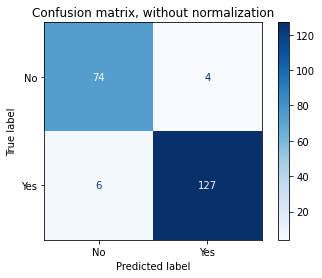

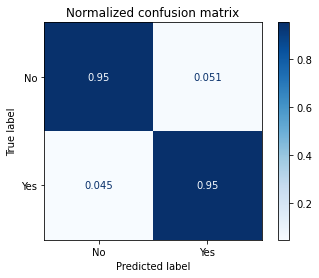

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=5, criterion='entropy')
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=pred))

              precision    recall  f1-score   support

          No       0.94      0.85      0.89        78
         Yes       0.91      0.97      0.94       133

    accuracy                           0.92       211
   macro avg       0.93      0.91      0.92       211
weighted avg       0.93      0.92      0.92       211



In [41]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, pred)
acc1

0.9241706161137441

### KNN Classification

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_test, y_pred)
acc2

0.95260663507109

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.93      0.95      0.94        78
         Yes       0.97      0.95      0.96       133

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

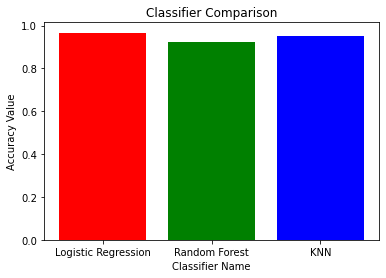

In [45]:
import matplotlib.pyplot as plt 

# x-coordinates of left sides of bars  
left = [1, 2, 3] 

# heights of bars 
height = [acc,acc1,acc2] 

# labels for bars 
tick_label = ['Logistic Regression', 'Random Forest', 'KNN'] 

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,width = 0.8, color = ['red', 'green','blue']) 

# naming the x-axis 
plt.xlabel('Classifier Name') 

# naming the y-axis 
plt.ylabel('Accuracy Value') 

# plot title 
plt.title('Classifier Comparison') 

# function to show the plot 
plt.show()